In [3]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint

from sheet_id.models.FCN import FCN
from sheet_id.utils.loss_functions import softmax_sparse_crossentropy_ignoring_background
from sheet_id.utils.metrics import sparse_accuracy_ignoring_background
from sheet_id.utils.dataPreprocessing import splitTrainValidation
from sheet_id.utils.dataGenerator import DataGenerator

/home/mirlab/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model = FCN(input_shape=(250,250,1), n_classes=124)

In [5]:
loss_fn = softmax_sparse_crossentropy_ignoring_background
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, 
                 epsilon=1e-8, decay=0.0, amsgrad=False)
metrics = [sparse_accuracy_ignoring_background]
model.compile(loss=loss_fn, optimizer=optimizer, metrics=metrics)

In [2]:
callbacks = []

In [6]:
train_partition, validation_partition = splitTrainValidation('../data/', max_size=500, test_size=20, npy_only=True)

In [7]:
params = {'dim': (250,250),
          'batch_size': 20,
          'n_classes': 124,
          'n_channels': 1,
          'shuffle': True,
          'crop': True,
          'crop_size': (250,250),
          'load_npy': True}
training_generator = DataGenerator(train_partition, **params)
validation_generator = DataGenerator(validation_partition, **params)

In [ ]:
history = model.fit_generator(generator=training_generator, epochs=10,
                              validation_data=validation_generator,
                              use_multiprocessing=True, workers=10,
                              callbacks=callbacks)

Epoch 1/10
24/24 [==============================] - 592s 25s/step - loss: 0.0133 - sparse_accuracy_ignoring_background: 0.7383 - val_loss: 0.0090 - val_sparse_accuracy_ignoring_background: 0.7397
Epoch 2/10
23/24 [===========================>..] - ETA: 11s - loss: 0.0129 - sparse_accuracy_ignoring_background: 0.7516

In [10]:
example_img, example_annotation = training_generator[0]

In [11]:
model.evaluate(example_img, example_annotation)

20/20 [==============================] - 1s 31ms/step


[0.037355393171310425, 0.6385099291801453]

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
prediction = model.predict(example_img)

In [17]:
prediction = np.argmax(prediction, axis=-1)

In [18]:
prediction.shape

(20, 250, 250)

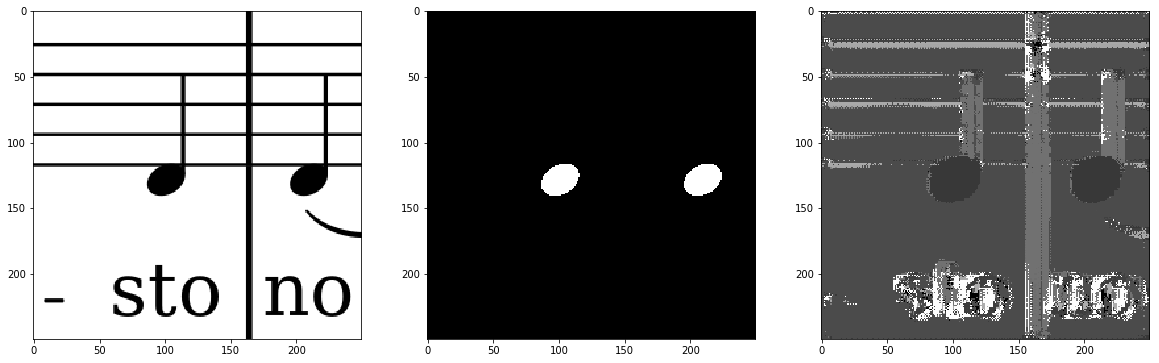

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(example_img[0,:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(example_annotation[0,:,:,0], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(prediction[0,:,:], cmap='gray')

In [20]:
np.unique(example_annotation[0,:,:,0])

array([ 0, 29])

In [21]:
np.unique(prediction)

array([  0,   3,   6,   8,  12,  17,  18,  28,  30,  32,  36,  37,  43,
        49,  51,  53,  57,  58,  59,  60,  62,  63,  76,  77,  78,  79,
        80, 114, 115])